In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Predicting KPU for the last year per patient using extended feature set

In [52]:
data = pd.read_csv('extended_stoma_dataset.csv')

In [54]:
data['end_year'] = data.dates.apply(lambda a: int(a.split('-')[1]))
data['birth_year'] = data['date_of_birth'].apply(lambda a: int('20'+a.split('.')[-1] ))
data['right_age'] = data[['end_year', 'birth_year']].apply(lambda a: a[0]-a[1], axis=1)
data['kpu'] = data[['num_caries', 'num_filling_caries',
                    'num_filling_no_caries', 
                    'num_removed_caused_by_caries', 'num_removed_other_reasons']].sum(axis=1)


In [55]:
train = data.drop(data[data['dates'] == '2017-2018'].index, axis=0) 
test = data[data['dates'] == '2017-2018']

In [56]:
print(train.shape, test.shape)

(1146, 25) (191, 25)


In [57]:
NUM_FEATURES = [
       'prosthesis crown veneer', 'sealed fissure', 'uncut tooth', 'fluorosis', 
               'sum_hygiene_index', 'right_age', ]
LAST_FEATURES = [ 'not_registered', 'num_caries',
       'num_filling_caries', 'num_filling_no_caries', 'num_healthy',
       'num_removed_caused_by_caries', 'num_removed_other_reasons',] #признаки, участвующие в расчете целевой метрики, берем их только за последний год
TARGET = ['kpu']
CAT_FEATURES = ['nationality', 'place_of_birth',
               'previous_place_of_living', 'bite_type', ]


In [58]:
train.columns

Index(['Unnamed: 0', 'dates', 'id', 'not_registered', 'num_caries',
       'num_filling_caries', 'num_filling_no_caries', 'num_healthy',
       'num_removed_caused_by_caries', 'num_removed_other_reasons',
       'prosthesis crown veneer', 'sealed fissure', 'uncut tooth', 'age',
       'nationality', 'date_of_birth', 'place_of_birth',
       'previous_place_of_living', 'bite_type', 'fluorosis',
       'sum_hygiene_index', 'end_year', 'birth_year', 'right_age', 'kpu'],
      dtype='object')

In [59]:

x_mean = train[NUM_FEATURES+['id']].groupby('id').mean()
x_cat = train[CAT_FEATURES+['id']].groupby('id').agg(lambda x:x.value_counts().index[0])
last_names = [c+' last' for c in NUM_FEATURES]
x_last = pd.DataFrame(columns=[c+' last' for c in NUM_FEATURES])
x_last[last_names] = train[NUM_FEATURES+['id']].groupby('id').last()

last_cor_target_names = [c+' previous year' for c in LAST_FEATURES]
x_prev_year = pd.DataFrame(columns=last_cor_target_names)
x_prev_year = train[LAST_FEATURES+['id']].groupby('id').agg(lambda x: x.iloc[:len(x)-1].iloc[-1])

x_past_target = train[TARGET+['id']].groupby('id').agg(lambda x: x.iloc[:len(x)-1].iloc[-1])
x_past_target.columns = ['kpu_last']
x_past_target['kpu'] = train[TARGET+['id']].groupby('id').agg(lambda x: x.iloc[-1])


In [60]:
x_prev_year

,not_registered,num_caries,num_filling_caries,num_filling_no_caries,num_healthy,num_removed_caused_by_caries,num_removed_other_reasons
id,,,,,,,
1101.xlsx,0,2,1,4,22,0,0
1102.xlsx,0,2,0,2,25,0,0
1103.xlsx,0,0,0,5,24,0,0
1104.xlsx,0,8,0,0,21,0,0
1105.xlsx,0,0,1,0,28,0,0
...,...,...,...,...,...,...,...
7412.xlsx,4,0,2,1,22,0,0
7413.xlsx,4,0,0,3,22,0,0
7414.xlsx,4,0,0,0,25,0,0


In [61]:

x_mean_test = data[NUM_FEATURES+['id']].groupby('id').mean()
x_cat_test = data[CAT_FEATURES+['id']].groupby('id').agg(lambda x:x.value_counts().index[0])
last_names = [c+' last' for c in NUM_FEATURES]
x_last_test = pd.DataFrame(columns=[c+' last' for c in NUM_FEATURES])
x_last_test[last_names] = data[NUM_FEATURES+['id']].groupby('id').last()

last_cor_target_names = [c+' previous year' for c in LAST_FEATURES]
x_prev_year_test = pd.DataFrame(columns=last_cor_target_names)
x_prev_year_test = data[LAST_FEATURES+['id']].groupby('id').agg(lambda x: x.iloc[:len(x)-1].iloc[-1])

x_past_target_test = data[TARGET+['id']].groupby('id').agg(lambda x: x.iloc[:len(x)-1].iloc[-1])
x_past_target_test.columns = ['kpu_last']
x_past_target_test['kpu'] = data[TARGET+['id']].groupby('id').agg(lambda x: x.iloc[-1])

In [62]:
x_past_target

,kpu_last,kpu
id,,
1101.xlsx,7,7
1102.xlsx,4,6
1103.xlsx,5,6
1104.xlsx,8,9
1105.xlsx,1,2
...,...,...
7412.xlsx,3,6
7413.xlsx,3,3
7414.xlsx,0,2


In [63]:
print(x_mean.shape, x_cat.shape, x_last.shape)

(191, 6) (191, 4) (191, 6)


In [64]:
x_train = pd.concat([x_mean, x_cat, x_last,x_prev_year_test, x_past_target['kpu_last']], axis=1)
y_train = x_past_target['kpu']

x_test = pd.concat([x_mean_test, x_cat_test, x_last_test, x_prev_year_test, x_past_target_test['kpu_last']], axis=1)
# y_test = test['kpu']
y_test = test[['id', 'kpu']].groupby('id').last()

In [65]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(191, 24) (191,) (191, 24) (191, 1)


In [66]:
CAT_FEATURES

['nationality', 'place_of_birth', 'previous_place_of_living', 'bite_type']

In [68]:
pd.Series(x_train.columns)

0          prosthesis crown veneer
1                   sealed fissure
2                      uncut tooth
3                        fluorosis
4                sum_hygiene_index
5                        right_age
6                      nationality
7                   place_of_birth
8         previous_place_of_living
9                        bite_type
10    prosthesis crown veneer last
11             sealed fissure last
12                uncut tooth last
13                  fluorosis last
14          sum_hygiene_index last
15                  right_age last
16                  not_registered
17                      num_caries
18              num_filling_caries
19           num_filling_no_caries
20                     num_healthy
21    num_removed_caused_by_caries
22       num_removed_other_reasons
23                        kpu_last
dtype: object

# Training Catboost

In [69]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error


train_labels = [6, 7, 8, 9]
model = CatBoostRegressor(iterations=20,
                          learning_rate=0.5,
                          depth=16)


In [70]:
model.fit(x_train, y_train,  train_labels)
y_pred = model.predict(x_test)
score = np.sqrt( mean_squared_error(y_test, y_pred ))
score

0:	learn: 3.4278399	total: 2.35ms	remaining: 44.7ms
1:	learn: 2.6109842	total: 5.58ms	remaining: 50.2ms
2:	learn: 1.9063385	total: 127ms	remaining: 721ms
3:	learn: 1.5020217	total: 131ms	remaining: 522ms
4:	learn: 1.2585175	total: 138ms	remaining: 413ms
5:	learn: 1.0522589	total: 151ms	remaining: 353ms
6:	learn: 0.9357508	total: 156ms	remaining: 290ms
7:	learn: 0.8575198	total: 164ms	remaining: 245ms
8:	learn: 0.8242659	total: 164ms	remaining: 201ms
9:	learn: 0.7995872	total: 169ms	remaining: 169ms
10:	learn: 0.7635074	total: 171ms	remaining: 140ms
11:	learn: 0.7319513	total: 174ms	remaining: 116ms
12:	learn: 0.7085183	total: 177ms	remaining: 95.3ms
13:	learn: 0.7057475	total: 179ms	remaining: 76.8ms
14:	learn: 0.6956581	total: 182ms	remaining: 60.7ms
15:	learn: 0.6874994	total: 186ms	remaining: 46.6ms
16:	learn: 0.6838780	total: 189ms	remaining: 33.4ms
17:	learn: 0.6636953	total: 300ms	remaining: 33.4ms
18:	learn: 0.6594321	total: 305ms	remaining: 16.1ms
19:	learn: 0.6458757	total: 33

1.430640306368229

Text(0.5,1,'Значимость признаков для модели')

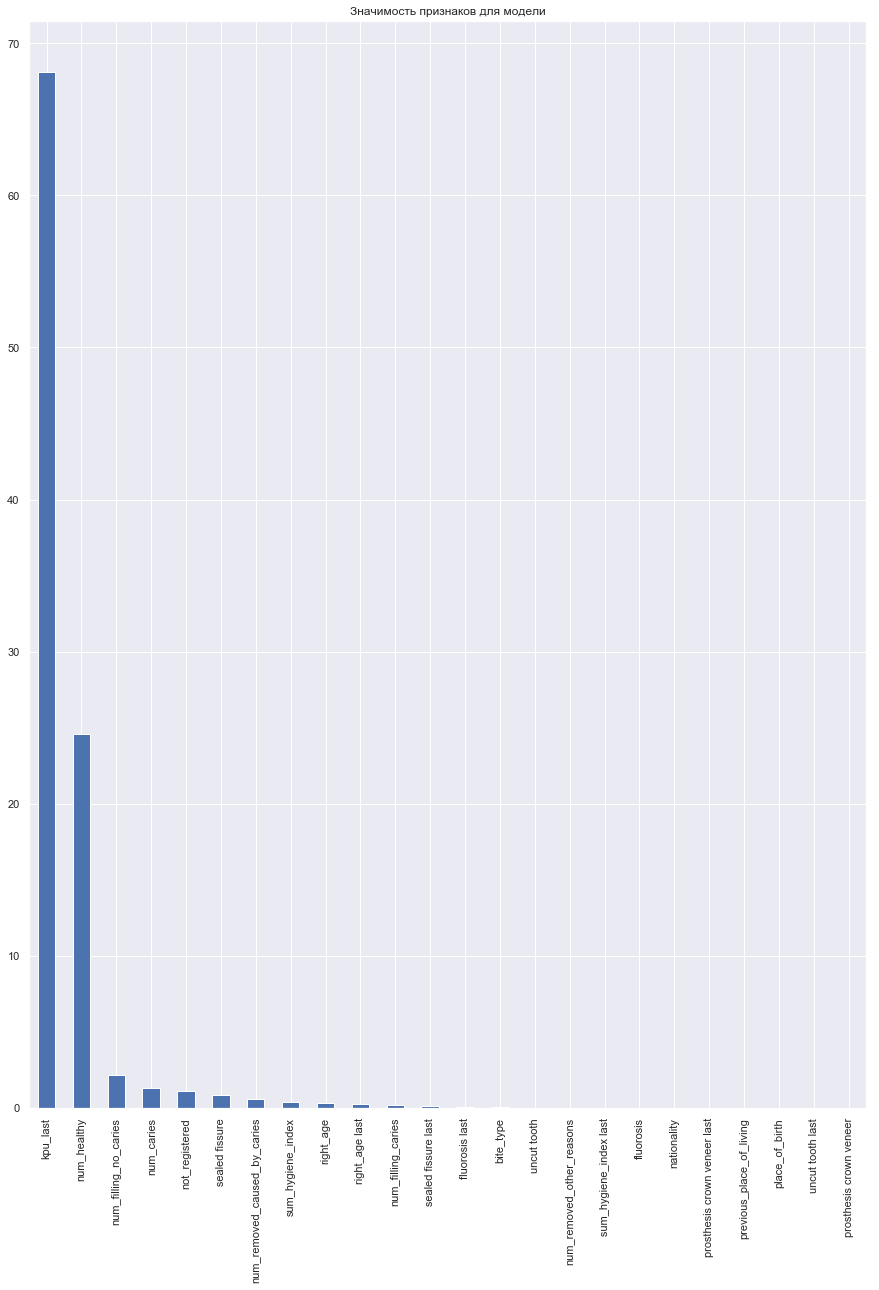

In [83]:
plt.figure(figsize=(15, 20))
pd.Series(index=x_train.columns, data=model.feature_importances_).sort_values(ascending=False).plot(kind='bar')
plt.title('Значимость признаков для модели')
# plt.show()